---
title: Financial Phrasebank
format:
    html:
        page-layout: article
        echo: true
        fig-width: 5
        fig-height: 3
---

# Financial Phrasebank

This notebook summarizes how the Financial Phrasbank dataset can be accessed and used.  
The phrasebank was developed by Malo et al. at the Aalto University in 2014.

## Dataset

This notebook will use the HuggingFace link for the public dataset:

[takala/financial_phrasebank](https://huggingface.co/datasets/takala/financial_phrasebank)

Other locations that can be used are:

- [https://www.researchgate.net/publication/251231364_FinancialPhraseBank-v10](https://www.researchgate.net/publication/251231364_FinancialPhraseBank-v10)
- [https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis](https://www.researchgate.net/publication/251231364_FinancialPhraseBank-v10)

Dataset summary:

- 16 annotators (3 researchers and 13 graduate students) classified sentences positive, negative or neutral.
- 4 different configurations depending on the agreement between the annotators.
- English news on OMX Helsinki listed companies
- Source database: LexisNexis
- 10,000 articles -> kept only sentences with lexicon entities -> 53,400 sentences
- Sentences were classified -> Random sample of ~5000 sentences selected as the final data for annotation.

Objective:

- Classify a sentence as whether the news may have a positive, negative, or neutral influence on the stock price.

The different configurations depend on how many of the annotators were in agreement on the classification:

| Agreement | Sentences |
| -- | -- |
| 100% | 2259 |
| >75% | 3448 |
| >66% | 4211 |
| >50% | 4840 |


## Reference

Pekka Malo, Ankur Sinha, Pekka Korhonen, Jyrki Wallenius, and Pyry Takala. 2014. [Good debt or bad debt: Detecting semantic orientations in economic texts.](https://asistdl.onlinelibrary.wiley.com/doi/full/10.1002/asi.23062) _Journal of the Association for Information Science and Technology_ 65, 4 (2014), 782–796.


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
from great_tables import GT, loc, style

import seaborn as sns

sns.set_theme(style="darkgrid", context="paper")

In [10]:
CONFIGURATIONS = [
    "sentences_50agree",
    "sentences_66agree",
    "sentences_75agree",
    "sentences_allagree",
]
CURRENT_CONFIGURATION = CONFIGURATIONS[0]

In [11]:
dataset = load_dataset(
    path="takala/financial_phrasebank", name=CURRENT_CONFIGURATION, trust_remote_code=True
)
df = dataset["train"].to_pandas()
df["label"] = df["label"].map({2: "positive (2)", 1: "neutral (1)", 0: "negative (0)"})

In [12]:
class_dist_df = df["label"].value_counts(normalize=True).to_frame().round(2) * 100

In [5]:
# | label: tbl-dist
# | tbl-cap: Distribution of classes (%)

GT(class_dist_df.astype(int).T)

neutral (1),positive (2),negative (0)
59,28,12


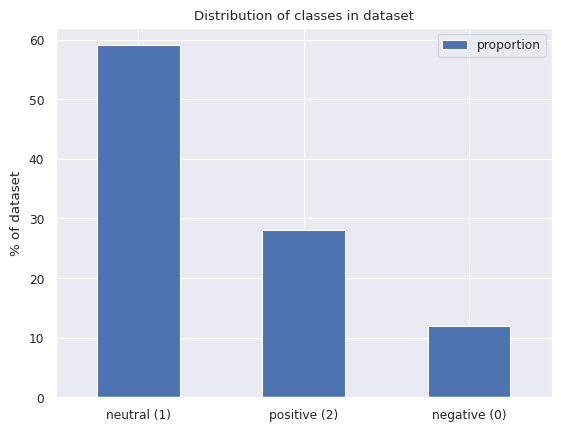

In [6]:
# | label: fig-dist
# | fig-cap: Distribution of classes in dataset

class_dist_df.plot(
    kind="bar", xlabel="", ylabel="% of dataset", rot=0, title="Distribution of classes in dataset"
)
plt.show()

@fig-dist and @tbl-dist shows the distribution of the classes in the dataset.

In [39]:
# | label: tbl-entries
# | tbl-cap: 10 first entries of FPB


def style_positive(df: pd.DataFrame):
    return df["label"] == "positive (2)"


def style_negative(df: pd.DataFrame):
    return df["label"] == "negative (0)"


GT(df.head(10)).cols_width(cases={"sentence": "80%"}).tab_style(
    style=style.fill(color="lightgreen"),
    locations=loc.body(columns=["label"], rows=style_positive),
).tab_style(
    style=style.fill(color="pink"),
    locations=loc.body(columns=["label"], rows=style_negative),
)

sentence,label
"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",neutral (1)
"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",neutral (1)
"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",negative (0)
With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,positive (2)
"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .",positive (2)
FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .,positive (2)
"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive (2)
"In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn .",positive (2)
Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales .,positive (2)
"Operating profit totalled EUR 21.1 mn , up from EUR 18.6 mn in 2007 , representing 9.7 % of net sales .",positive (2)


## Export dataset to CSV

In [ ]:
# | output: false

dataset["train"].to_csv(f"fpb_{CURRENT_CONFIGURATION}.csv")